# Regresja Liniowa

### Generate data

Generate synthetic data for following examples.

In [1]:
# import numpy as np
# import pandas as pd
# # 1d
# n = 100
# X = np.random.rand(n)
# y = 4 + 3 * X + np.random.randn(n) / 10
# pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("data/dane_1.csv", index=False)

# y = 4 + 3 * X + np.random.randn(n) / 3
# pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("data/dane_1_h.csv", index=False)

# # 2d
# n = 100
# X1 = np.random.rand(n)
# X2 = np.random.rand(n)
# y = 4 -3*X1 + 5*X2 + np.random.randn(n) / 100
# pd.DataFrame({"zmienna_1": X1, 
#               "zmienna_2": X2, 
#               "target": y}).to_csv("dane_2.csv", index=False)

# # non linear
# n = 100
# X = np.random.uniform(-10, 10, n)
# y =  X*X + 2*X -3 + 5 * np.random.randn(n)
# pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("data/dane_sq.csv", index=False)

# n = 100
# X = np.random.uniform(-10, 10, n)
# y =  X**3 + 3*X*X + 2*X -3 + 50 * np.random.randn(n)
# pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("data/dane_cb.csv", index=False)

# n = 10
# X = np.random.uniform(-5, 5, n)
# y =  np.sin(X) + np.random.randn(n) * 0.1
# pd.DataFrame({"zmienna_1": X, "target": y}).to_csv("data/dane_pl.csv", index=False)

# Simple Linear Regression

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

- How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).
- The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from IPython.display import display

In [3]:
# Load data

df = pd.read_csv("./data/dane_1.csv")
df.head(5)

,zmienna_1,target
0,0.285417,4.745931
1,0.851391,6.652426
2,0.032646,4.076843
3,0.660575,6.059159
4,0.911187,6.894236


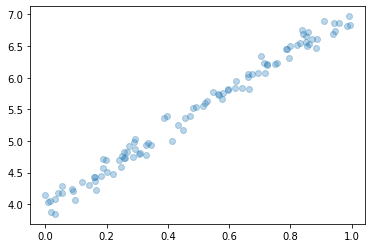

In [4]:
# Visualisation
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.show()

# # Visualisation by pandas
# df.plot.scatter('zmienna_1', 'target')
# plt.show()

In [5]:
# Add constant term
df['intercept'] = 1
df.head()

,zmienna_1,target,intercept
0,0.285417,4.745931,1
1,0.851391,6.652426,1
2,0.032646,4.076843,1
3,0.660575,6.059159,1
4,0.911187,6.894236,1


In [6]:
# Create variables
X = df[['zmienna_1', 'intercept']].values
y = df[['target']].values
print(f"X: \n{X[:10]}")
print(f"y: \n{y[:10]}")

X: 
[[0.28541749 1.        ]
 [0.85139105 1.        ]
 [0.03264604 1.        ]
 [0.6605748  1.        ]
 [0.91118692 1.        ]
 [0.03161806 1.        ]
 [0.54732297 1.        ]
 [0.85359196 1.        ]
 [0.74889326 1.        ]
 [0.78711723 1.        ]]
y: 
[[4.74593071]
 [6.65242566]
 [4.07684295]
 [6.05915898]
 [6.89423636]
 [3.84824792]
 [5.77060427]
 [6.49300984]
 [6.20899012]
 [6.45367155]]


**Gauss Markov Theorem**

The Gauss–Markov theorem (or simply Gauss theorem for some authors) states that the ordinary least squares (OLS) estimator:

$$\hat{\theta} = (X^T \cdot X) ^ {-1} \cdot X^T \cdot y$$

has the lowest sampling variance within the class of linear unbiased estimators, if the errors in the linear regression model are uncorrelated, have equal variances and expectation value of zero. The errors do not need to be normal, nor do they need to be independent and identically distributed (only uncorrelated with mean zero and homoscedastic with finite variance). The requirement that the estimator be unbiased cannot be dropped, since biased estimators exist with lower variance.



In [7]:
# Find coeficients - OLS
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([[3.0637054 ],
       [3.96046883]])

In [8]:
# Prediction
y_pred = theta[1] + theta[0] * df['zmienna_1']

# line
x_line = np.linspace(df['zmienna_1'].min(), df['zmienna_1'].max(), 100)
y_line = theta[1] + theta[0] * x_line

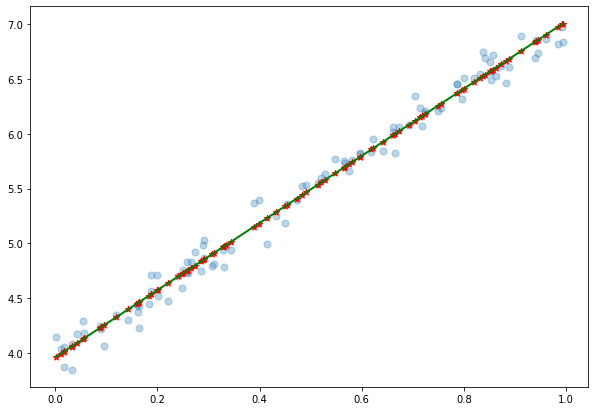

In [9]:
# Visualisation
plt.figure(figsize=(10, 7))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3, s=50)
plt.scatter(df['zmienna_1'], y_pred, c='red', s=40, marker='*')
plt.plot(x_line, y_line, color='green', linewidth=2)
plt.show()

In [10]:
# Calcualte residuals
error = y_pred.values.reshape(-1, 1) - y
error = np.round(error, 5)
np.round(error.sum(), 4)

-0.0

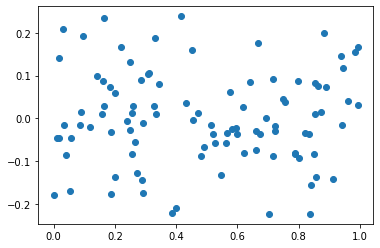

In [11]:
# Plot residuals
plt.scatter(df['zmienna_1'], error)

In [12]:
# calculate MSE
mse = ((y_pred.values.reshape(-1, 1) - y) ** 2).sum()/y.size
print(f"MSE: {mse}")

MSE: 0.011499899432557185


# Ordinary Least Squares -  `statsmodels`

https://www.statsmodels.org/stable/index.html \
http://net-informations.com/ds/mla/ols.htm

In [13]:
# !pip install statsmodels

In [14]:
import pandas as pd
import numpy as np

### Example 1: `Salary_Data.csv`

In [15]:
# Load dataset
df = pd.read_csv("data/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
# set variables
x_var = 'YearsExperience'
target = 'Salary'
X = df[x_var]
Y = df[target]

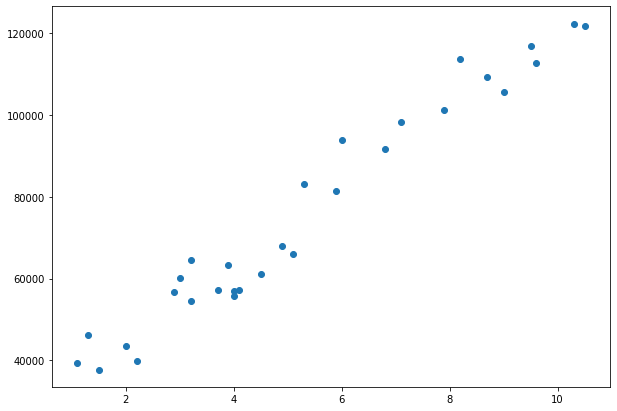

In [17]:
# Data visualisation
plt.figure(figsize=(10, 7))
plt.scatter(X, Y)
plt.show()

In [18]:
# Using statsmodels
import statsmodels.api as sm

# Add free term
X = sm.add_constant(X)
print("Dataset:")
display(X.head())

# Fitting model:
model = sm.OLS(Y, X).fit()
summary = model.summary()
summary  # print(summary)

Dataset:


,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.14e-20
Time:                        11:20:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


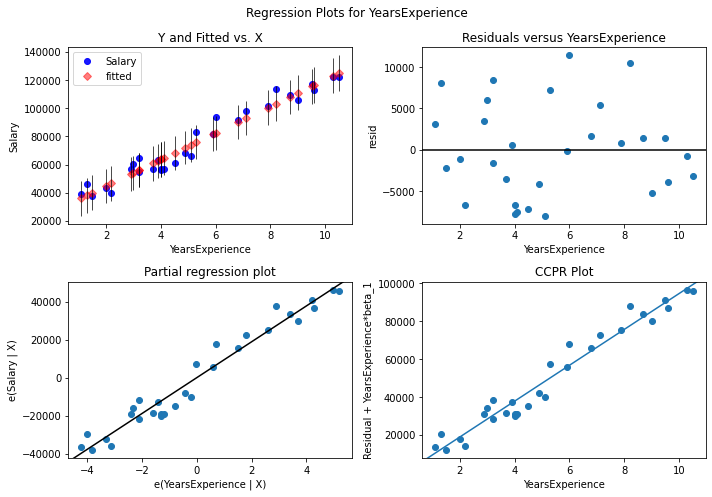

In [19]:
# plot statistics
fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

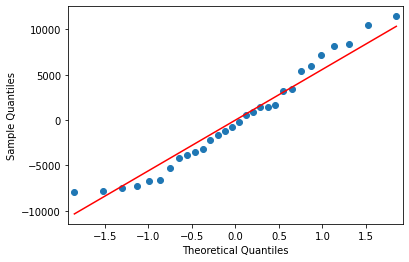

In [20]:
# Chcek residuals qq-plot
# https://en.wikipedia.org/wiki/Q–Q_plot
res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

### Example 2: `dane_1.csv`

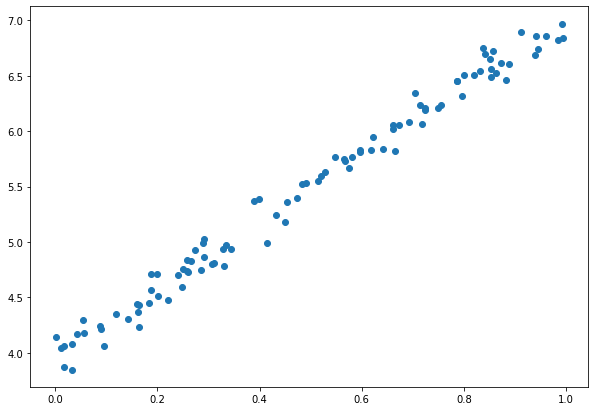

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7031.
Date:                Tue, 03 May 2022   Prob (F-statistic):           4.79e-93
Time:                        11:20:52   Log-Likelihood:                 81.377
No. Observations:                 100   AIC:                            -158.8
Df Residuals:                      98   BIC:                            -153.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9605      0.021    189.893      0.0

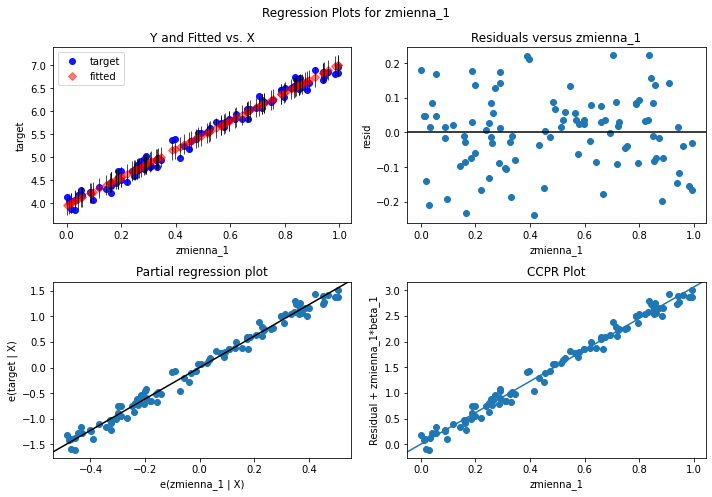

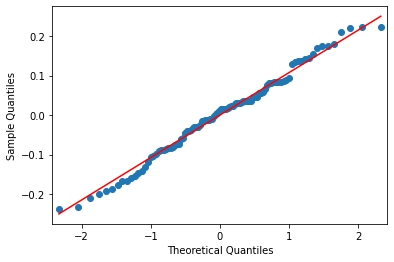

In [21]:
df = pd.read_csv("data/dane_1.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.figure(figsize=(10, 7))
plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

### Example 3: `dane_1_h.csv` - high variance

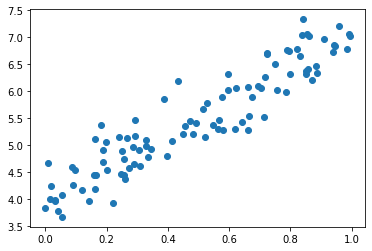

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     638.4
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.04e-44
Time:                        11:20:54   Log-Likelihood:                -37.671
No. Observations:                 100   AIC:                             79.34
Df Residuals:                      98   BIC:                             84.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9887      0.069     58.153      0.0

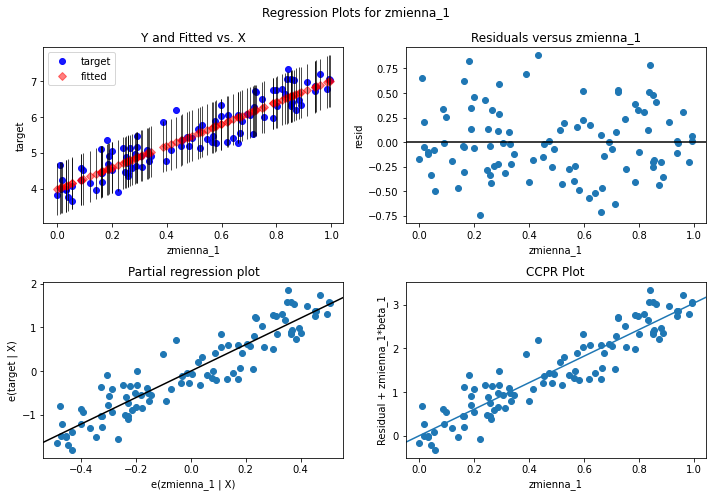

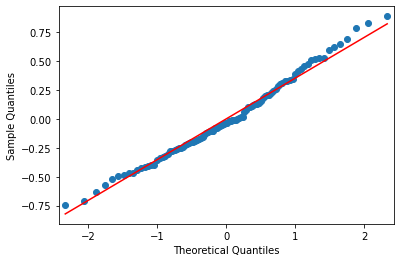

In [22]:
df = pd.read_csv("data/dane_1_h.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

### Example 4: `dane_sq.csv` - squared

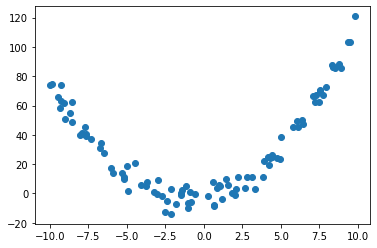

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     7.724
Date:                Tue, 03 May 2022   Prob (F-statistic):            0.00653
Time:                        11:20:57   Log-Likelihood:                -484.54
No. Observations:                 100   AIC:                             973.1
Df Residuals:                      98   BIC:                             978.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9581      3.110      9.956      0.0

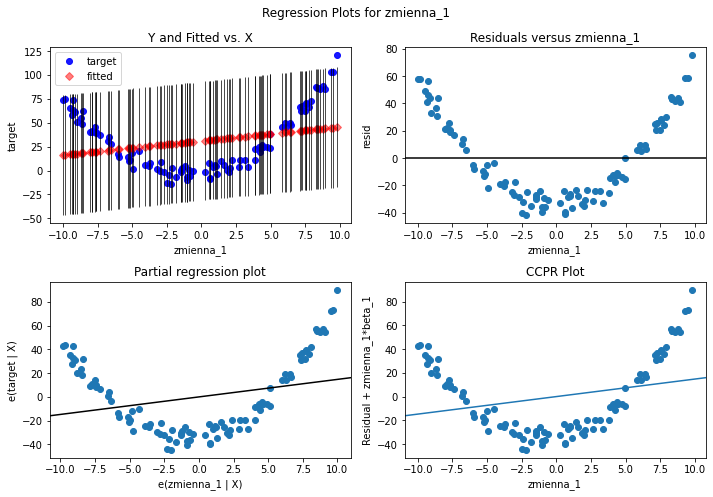

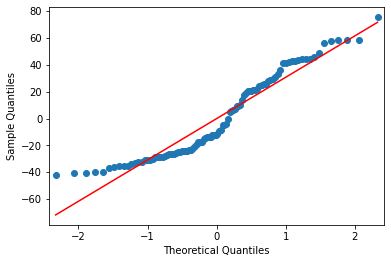

In [23]:
df = pd.read_csv("data/dane_sq.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

In [24]:
# Calculate residuals
np.round(model.resid.sum(), 4)

-0.0

### Example 5: `dane_cb.csv` - cube

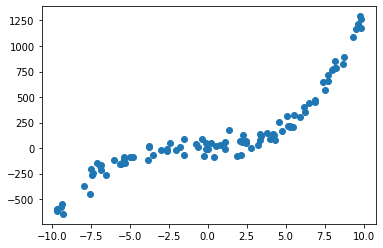

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     365.0
Date:                Tue, 03 May 2022   Prob (F-statistic):           8.14e-35
Time:                        11:21:00   Log-Likelihood:                -667.22
No. Observations:                 100   AIC:                             1338.
Df Residuals:                      98   BIC:                             1344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.4332     19.494      4.844      0.0

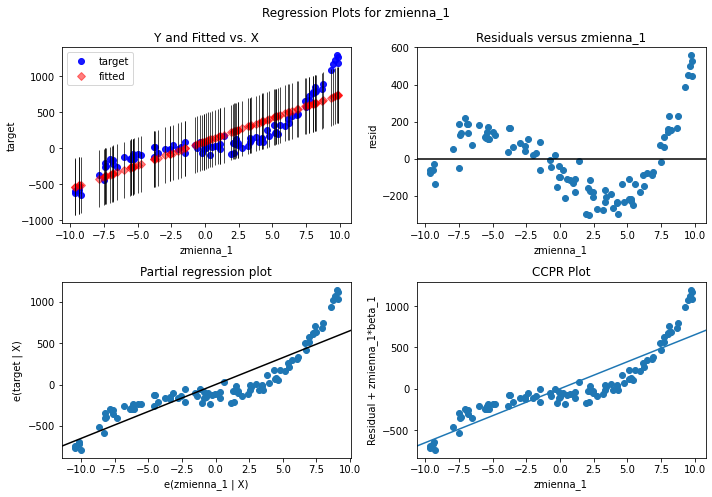

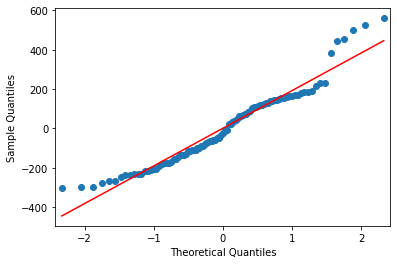

In [25]:
df = pd.read_csv("data/dane_cb.csv")

x_var = 'zmienna_1'
target = 'target'
X = df[x_var]
Y = df[target]

plt.scatter(X, Y)
plt.show()

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, x_var, fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

In [26]:
np.round(model.resid.sum(), 4)

0.0

# Multivariate Regression

In [27]:
import pandas as pd

df = pd.read_csv("data/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,1.7,1.4,4.7,1.9,New York
1,1.6,1.5,4.4,1.9,California
2,1.5,1.0,4.1,1.9,Florida
3,1.4,1.2,3.8,1.8,New York
4,1.4,0.9,3.7,1.7,Florida


### Dummy variable trap

In [28]:
X_d = pd.get_dummies(df)
X_d['intercept']  = 1

X_d.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York,intercept
0,1.7,1.4,4.7,1.9,0,0,1,1
1,1.6,1.5,4.4,1.9,1,0,0,1
2,1.5,1.0,4.1,1.9,0,1,0,1
3,1.4,1.2,3.8,1.8,0,0,1,1
4,1.4,0.9,3.7,1.7,0,1,0,1


In [29]:
y = X_d.pop('Profit').values.reshape(-1, 1)
X = X_d.values

#### Use OLS equation

In [30]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

LinAlgError: Singular matrix

In [31]:
# Calculate `det` of inversed matrix 
np.linalg.det(X.T.dot(X))

0.0

#### Use `statsmodel` 

In [32]:
model = sm.OLS(y.flatten(), X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     159.2
Date:                Tue, 03 May 2022   Prob (F-statistic):           5.21e-27
Time:                        11:21:22   Log-Likelihood:                 48.681
No. Observations:                  50   AIC:                            -85.36
Df Residuals:                      44   BIC:                            -73.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8241      0.048     17.022      0.0

<hr>

```The smallest eigenvalue is 3.96e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.```

<hr>

In [33]:
from sklearn.linear_model import LinearRegression

r = LinearRegression(fit_intercept=False)
r.fit(X, y)

LinearRegression(fit_intercept=False)

In [34]:
r.coef_

array([[ 0.82412269, -0.05339375,  0.02612216,  0.13779614,  0.13331639,
         0.12561998,  0.39673251]])

**`sklearn` liblary doesn't highlighted information that $X^TX$ is singular matrix!**

#### Drop one ohe column

In [35]:
X_d.drop('State_California', axis=1, inplace=True)
X = X_d.values

In [36]:
print(f"Wyznacznik: {np.linalg.det(X.T.dot(X))}")
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

Wyznacznik: 4986659.022899932


array([[ 0.82412269],
       [-0.05339375],
       [ 0.02612216],
       [-0.00447975],
       [-0.01217616],
       [ 0.53452865]])

In [37]:
model = sm.OLS(y.flatten(), X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     159.2
Date:                Tue, 03 May 2022   Prob (F-statistic):           5.21e-27
Time:                        11:23:10   Log-Likelihood:                 48.681
No. Observations:                  50   AIC:                            -85.36
Df Residuals:                      44   BIC:                            -73.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8241      0.048     17.022      0.0

### Feature selection - Backward elimination for regression analysis

In [38]:
X.shape

(50, 6)

In [39]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)

In [40]:
regressor_OLS = sm.OLS(y, X_opt).fit()
summary = regressor_OLS.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     159.2
Date:                Tue, 03 May 2022   Prob (F-statistic):           5.21e-27
Time:                        11:23:17   Log-Likelihood:                 48.681
No. Observations:                  50   AIC:                            -85.36
Df Residuals:                      44   BIC:                            -73.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8241      0.048     17.022      0.0

<hr>

Test hipothesis:
- `H0` - coeficient is equal `0`
- `H1` - coeficient is not equal `0`

Check `p-value`. \
Remove variable with highest `p-value` above given siginficant level (usually 0.05).

<hr>

In [41]:
X_opt = X[:, [0, 1, 2, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y, X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 03 May 2022   Prob (F-statistic):           3.44e-28
Time:                        11:24:46   Log-Likelihood:                 48.672
No. Observations:                  50   AIC:                            -87.34
Df Residuals:                      45   BIC:                            -77.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8242      0.048     17.212      0.0

In [42]:
X_opt = X[:, [0, 1, 2, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y, X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     276.4
Date:                Tue, 03 May 2022   Prob (F-statistic):           2.01e-29
Time:                        11:24:46   Log-Likelihood:                 48.605
No. Observations:                  50   AIC:                            -89.21
Df Residuals:                      46   BIC:                            -81.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8223      0.047     17.451      0.0

In [43]:
X_opt = X[:, [0, 2, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y, X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     414.0
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.43e-30
Time:                        11:24:46   Log-Likelihood:                 48.060
No. Observations:                  50   AIC:                            -90.12
Df Residuals:                      47   BIC:                            -84.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8041      0.044     18.473      0.0

In [44]:
X_opt = X[:, [0, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(y, X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     779.2
Date:                Tue, 03 May 2022   Prob (F-statistic):           2.50e-31
Time:                        11:24:48   Log-Likelihood:                 46.130
No. Observations:                  50   AIC:                            -88.26
Df Residuals:                      48   BIC:                            -84.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8651      0.031     27.915      0.0

In [45]:
# Visualisation

# Regresja w `SKLEARN`

## Simple Linear Regression

In [46]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv("data/dane_1.csv")
display(df.head())
X = df['zmienna_1'].values.reshape(-1, 1)
# X = df[['zmienna_1']]
y = df['target']

,zmienna_1,target
0,0.285417,4.745931
1,0.851391,6.652426
2,0.032646,4.076843
3,0.660575,6.059159
4,0.911187,6.894236


In [48]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [49]:
print(f"Coeficients: \n{np.round(m.coef_, 5)}")
print(f"Intercept:   {np.round(m.intercept_, 5)}")

Coeficients: 
[3.06371]
Intercept:   3.96047


In [50]:
# Visualisation

In [51]:
print(f"R^2 Score: {m.score(X, y)}")

R^2 Score: 0.9862532296148276


## Multivariate Regression

In [52]:
df = pd.read_csv("data/portland_housing.txt")
display(df.head())
y = df.pop('Price')
X = df

print(f"X: \n{X[:10]}")
print(f"y: \n{y[:10]}")

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


X: 
   Size  Bedrooms
0  2104         3
1  1600         3
2  2400         3
3  1416         2
4  3000         4
5  1985         4
6  1534         3
7  1427         3
8  1380         3
9  1494         3
y: 
0    399900
1    329900
2    369000
3    232000
4    539900
5    299900
6    314900
7    198999
8    212000
9    242500
Name: Price, dtype: int64


In [53]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

print(f"R_2 score: {regressor.score(X, y)}")

R_2 score: 0.7329450180289143


## Polynomial Regression

### Check Simple Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv("data/dane_sq.csv")
display(df.head())

X = df[['zmienna_1']].values
y = df[['target']].values

model = LinearRegression()
model.fit(X, y)

,zmienna_1,target
0,4.130428,24.557000
1,9.488584,103.565217
2,-0.840354,-5.865828
3,-4.474370,20.637770
4,-5.935492,13.934624


LinearRegression()

In [67]:
print(f"Coeficients: {model.coef_}")
print(f"Intercept:   {model.intercept_}")

Coeficients: [[1.47558619]]
Intercept:   [30.95810234]


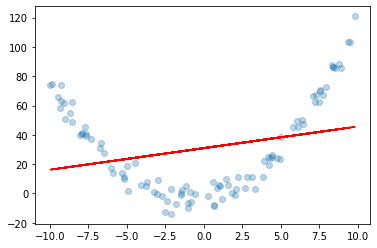

In [68]:
y_pred = model.predict(X)
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.plot(df['zmienna_1'], y_pred, c='red')
plt.show()

The predictions seem not to be accurate...

### Multivariate Regression with `sklearn`

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

np.set_printoptions(suppress=True)

In [81]:
X[0] ** 2

array([17.06043614])

In [82]:
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_transformer.fit(X)
X_poly = poly_transformer.transform(X)
X_poly[:10]

array([[ 4.13042808, 17.06043614],
       [ 9.48858384, 90.03322335],
       [-0.84035412,  0.70619505],
       [-4.4743704 , 20.01999048],
       [-5.93549202, 35.23006555],
       [ 1.59425442,  2.54164716],
       [-1.01375193,  1.02769298],
       [-3.02297232,  9.13836165],
       [ 2.00920276,  4.03689573],
       [-7.71478791, 59.51795247]])

In [83]:
model = LinearRegression()
model.fit(X_poly, y)

print(f"Coeficients: {model.coef_}")
print(f"Intercept:   {model.intercept_}")

Coeficients: [[1.99326032 0.99077471]]
Intercept:   [-2.93433152]


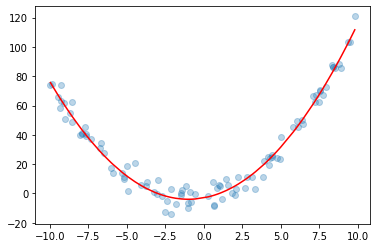

In [84]:
y_pred = model.predict(X_poly)

xs, ys = zip(*sorted(zip(X, y_pred)))

plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.plot(xs, ys, c='red')
plt.show()

The intercept is fitted in `LinearRegression` module.

In [85]:
poly_transformer = PolynomialFeatures(degree=2)  # parameter as default is include_bias=True
poly_transformer.fit(X)
X_poly = poly_transformer.transform(X)
X_poly[:10]

array([[ 1.        ,  4.13042808, 17.06043614],
       [ 1.        ,  9.48858384, 90.03322335],
       [ 1.        , -0.84035412,  0.70619505],
       [ 1.        , -4.4743704 , 20.01999048],
       [ 1.        , -5.93549202, 35.23006555],
       [ 1.        ,  1.59425442,  2.54164716],
       [ 1.        , -1.01375193,  1.02769298],
       [ 1.        , -3.02297232,  9.13836165],
       [ 1.        ,  2.00920276,  4.03689573],
       [ 1.        , -7.71478791, 59.51795247]])

We can see that intercept is included in transformed data.

We should exclude intercept from `LinearRegression` instance:

In [86]:
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

print(f"Coeficients: {model.coef_}")
print(f"Intercept:   {model.intercept_}")

Coeficients: [[-2.93433152  1.99326032  0.99077471]]
Intercept:   0.0


We can see that Intercept is `0.0` and is included in coefficietns matrix. /

Otherwaise we obtain:

In [89]:
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

print(f"Coeficients: {model.coef_}")
print(f"Intercept:   {model.intercept_}")

Coeficients: [[0.         1.99326032 0.99077471]]
Intercept:   [-2.93433152]


### Use `statsmodel`

We need to transform data manually (e.g. using `sklearn`).

In [92]:
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_transformer.fit(X)
X_poly = poly_transformer.transform(X)
X_poly[:10]

array([[ 4.13042808, 17.06043614],
       [ 9.48858384, 90.03322335],
       [-0.84035412,  0.70619505],
       [-4.4743704 , 20.01999048],
       [-5.93549202, 35.23006555],
       [ 1.59425442,  2.54164716],
       [-1.01375193,  1.02769298],
       [-3.02297232,  9.13836165],
       [ 2.00920276,  4.03689573],
       [-7.71478791, 59.51795247]])

In [93]:
X_poly = sm.add_constant(X_poly)

model = sm.OLS(y, X_poly).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1828.
Date:                Tue, 03 May 2022   Prob (F-statistic):           9.99e-78
Time:                        11:38:19   Log-Likelihood:                -305.55
No. Observations:                 100   AIC:                             617.1
Df Residuals:                      97   BIC:                             624.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9343      0.782     -3.751      0.0

eval_env: 1


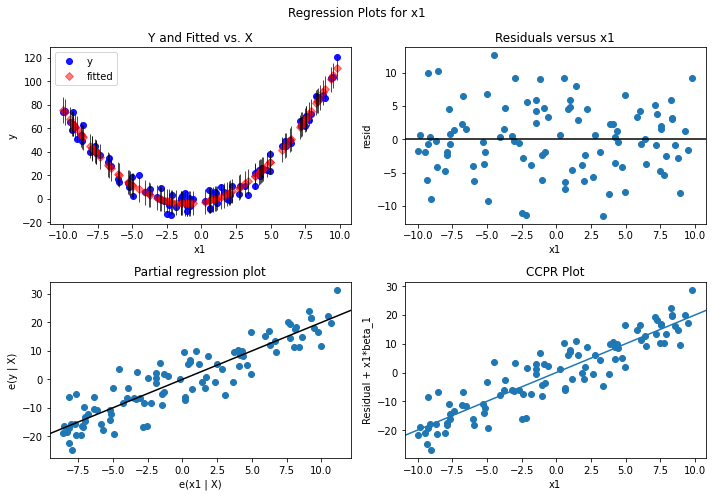

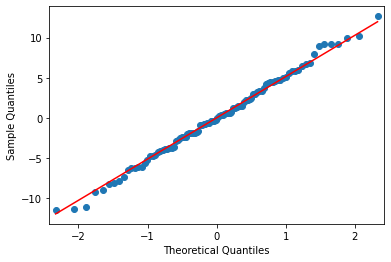

eval_env: 1


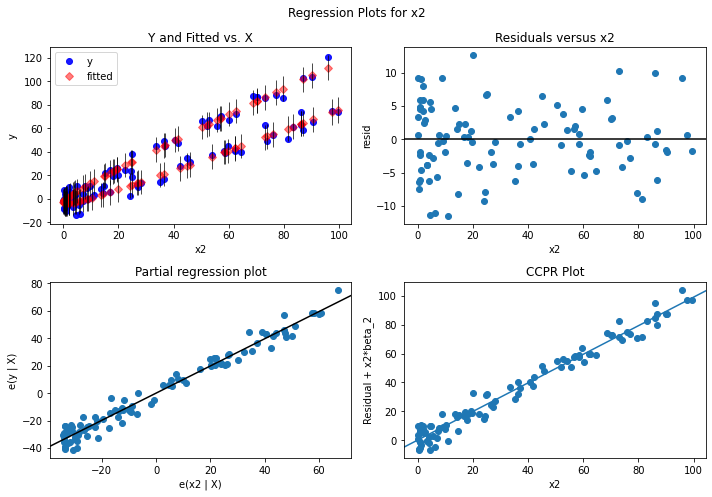

In [94]:
fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, 'x1', fig=fig)
plt.show()

res = model.resid
fig, ax = plt.subplots()

sm.graphics.qqplot(res, line='s', ax=ax)
plt.show()

fig = plt.figure(figsize=(10, 7))
sm.graphics.plot_regress_exog(model, 'x2', fig=fig)
plt.show()

# Gradient descent

### Gradient descent

In [95]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/dane_1.csv")
df['intercept'] = 1
X = df[['zmienna_1', 'intercept']].values
y = df[['target']].values

```Python
for i in range(no_epoch):
    for n in range(no_observation):
```

Initial coeficients: 
[[0.15645454]
 [1.54745938]]


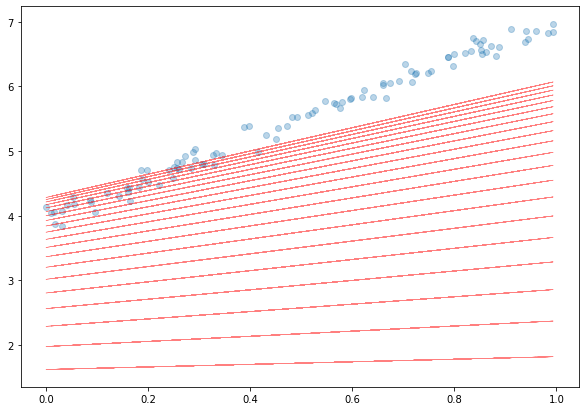

Final coeficients: 
[[1.81726806]
 [4.30482374]]


In [96]:
eta = 0.01  # learning rate
n_iterations = 100
m = df.shape[0]

theta = np.random.randn(2,1)  # random initialization
print(f"Initial coeficients: \n{theta}")

plt.figure(figsize=(10, 7))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)

for iteration in range(n_iterations):
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradients
    
    y_pred = theta[1] + theta[0] * df['zmienna_1']
    if not iteration % 5:
        plt.plot(df['zmienna_1'], y_pred, c='red', linewidth=0.5, alpha=0.5)

plt.show()
print(f"Final coeficients: \n{theta}")

### Stochastic Gradient descent

In [ ]:
n_epochs = 1
t0, t1 = 5, 50  # learning schedule hyperparameters
theta_path_sgd = []
eta0 = 0.01

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
print(f"Initial coeficients: \n{theta}")

plt.figure(figsize=(10, 7))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)

for epoch in range(n_epochs):
    for i in range(m):                          
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        # eta = learning_schedule(epoch * m + i)
        eta = eta0
        
        theta = theta - eta * gradients  
        if not i % 5:
            y_predict = X.dot(theta)                  
            plt.plot(df['zmienna_1'], y_predict, c='red', linewidth=0.5, alpha=0.5)
        

plt.show() 

print(f"Final coeficients: \n{theta}")

### (Stochastic) Gradient Descent in `sklearn`

In [107]:
df = pd.read_csv("data/dane_1.csv")
X = df[['zmienna_1']].values
y = df[['target']].values

In [108]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(learning_rate='constant', 
                   max_iter=10, 
                   eta0=0.01,
                   penalty=None)
reg.fit(X, y.flatten())


/Users/kamilpabijan/Documents/SDA/Learning_repo/venv_app/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=10, penalty=None)

In [109]:
print(f"Coeficients {reg.coef_}")
print(f"Intercept {reg.intercept_}")

Coeficients [2.67418004]
Intercept [4.16059936]


# Ocena jakości modelu

## $R^2$ score

R-squared ($R^2$) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [113]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv("data/portland_housing.txt")
display(df.head())

X = df[['Size']].values
y = df[['Price']].values

model = LinearRegression()
model.fit(X, y)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


LinearRegression()

In [114]:
r2 = model.score(X, y)
print(f"R2 score: {r2}")

R2 score: 0.7310037839755306


In [115]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R2 score: {r2}")

R2 score: 0.7310037839755306


### Multivariate Regression

In [120]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv("data/portland_housing.txt")
display(df.head())

X = df[['Size', 'Bedrooms']].values
y = df[['Price']].values

model = LinearRegression()
model.fit(X, y)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


LinearRegression()

In [121]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R2 score: {r2}")

R2 score: 0.7329450180289143


In [124]:
# R2 is not "symetric"
print(r2_score(y, y_pred))
print(r2_score(y_pred, y))  # mistake!

0.7329450180289143
0.6356411798946826


In [125]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_pred, y))
print(mean_absolute_error(y, y_pred))

51502.76840573898
51502.76840573898


In [126]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_pred, y))
print(mean_absolute_percentage_error(y, y_pred))

0.15415551949181408
0.15607399762704602


In [127]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))
print(mean_squared_error(y, y_pred))

4086560101.2056565
4086560101.2056565


In [128]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y, squared=False))
print(mean_squared_error(y, y_pred, squared=False))

63926.20824986929
63926.20824986929


<hr>

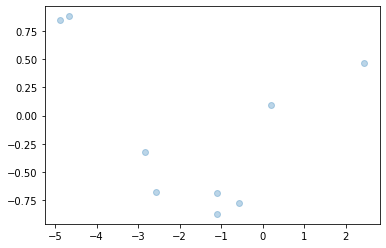

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

import pandas as pd

df = pd.read_csv("data/dane_pl.csv")[:-1]

X = df[['zmienna_1']].values
y = df[['target']].values

plt.scatter(X, y, alpha=0.3)
plt.show()

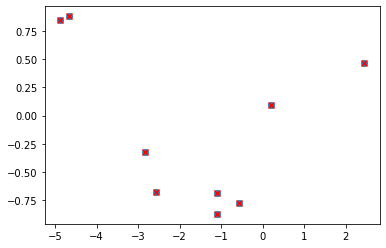

In [130]:
pol = PolynomialFeatures(degree=9, include_bias=False)
X_poly = pol.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
xs, ys = zip(*sorted(zip(X, y_pred)))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.9)
plt.scatter(xs, ys, c='red', marker='x')

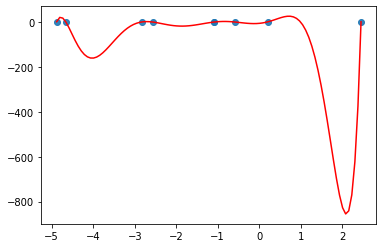

In [131]:
x_lin = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_lin_pol = pol.transform(x_lin)
y_pr_lin = model.predict(x_lin_pol)
plt.scatter(df['zmienna_1'], df['target'], alpha=0.9)
plt.plot(x_lin, y_pr_lin, c='red')

In [132]:
results = {}

for i in range(1, 21):
    pol = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = pol.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    
    results[f"degree: {i}"] = {"r2_score": r2_score(y, y_pred),
                               "mean_squared_error": mean_squared_error(y, y_pred)}

In [ ]:
degree = 13
pol = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = pol.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

xs, ys = zip(*sorted(zip(X, y_pred)))
plt.scatter(df['zmienna_1'], df['target'], alpha=0.3)
plt.scatter(xs, ys, c='red', marker='x')


# xc = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# yc = model.predict(pol.transform(x_cont))

# plt.plot(xc, yc, alpha = 0.3)
# plt.show()